<a href="https://colab.research.google.com/github/ABI0508/Time-Series-Analysis-/blob/main/Time_series_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trend for the dataset

t    x_t       Trend     
------------------------------
5    46383     28314.2500
6    57570     28402.0000
7    52261     27984.6000
8    30125     27506.1000
9    17522     26358.1000
10   12651     23747.7500
11   7285      20666.7000
12   7939      18812.5500
13   9283      19601.6500
14   12934     22420.4000
15   13432     25005.9500
16   28900     26502.8000
17   43848     27217.8000
18   54320     27355.6500
19   49702     27094.4500
20   32182     26649.2000
21   17691     25571.7500
22   11833     23266.8500
23   8146      20582.6000
24   8847      19514.3000
25   8614      21098.3000
26   12169     24047.5500
27   14481     26511.1000
28   30002     27850.3000
29   52654     28435.7000
30   60910     28617.2500
31   47948     28422.6500
32   30847     27955.3000
33   15916     27022.5000
34   12785     24483.6500
35   8307      21099.1500
36   8584      19478.8500
37   8719      20418.4500
38   17108     22753.2500
39   14771     24762.5000
40   31103     26012.8000
41   45

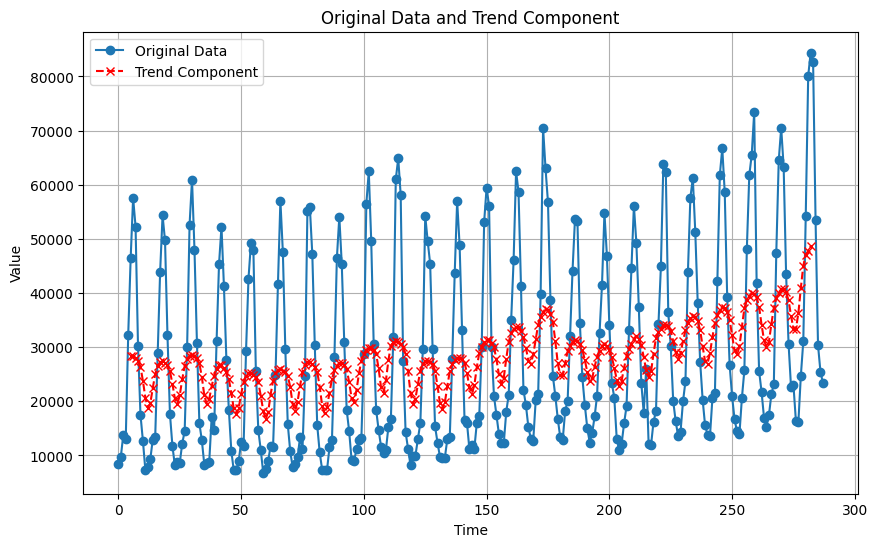

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to the CSV file
csv_path = '/content/data.csv'

# Read data from CSV file
data = pd.read_csv(csv_path)

# Extract relevant columns
dates = data['Date']
xt = data['TouristNumber']

# Specify d directly
d = 10  # Example value, replace with the desired value

# Calculate q based on d if d is even, else take q as input
if d % 2 == 0:
    q = d // 2  # If d is even, calculate q as d / 2
else:
    q = 3  # Example value, replace with the desired value for odd d

# Function to calculate trend based on the correct formula
def calculate_trend(xt, q, d):
    trend_values = []
    n = len(xt)

    # Case when d is even and d = 2q
    if d % 2 == 0:
        for t in range(q, n - q):
            # Apply the corrected formula
            trend_value = (0.5 * xt[t - q] + sum(xt[t - q + 1:t + q]) + 0.5 * xt[t + q]) / d
            trend_values.append(trend_value)

    # Case when d is odd (use the different formula)
    else:
        for t in range(q, n - q):
            trend_value = (1 / (2 * q + 1)) * sum(xt[t - j] for j in range(-q, q + 1))
            trend_values.append(trend_value)

    return trend_values

# Compute trend component
trend = calculate_trend(xt, q, d)

# Print original and trend data with corresponding t and xt values
print(f"{'t':<5}{'x_t':<10}{'Trend':<10}")
print("-" * 30)
for t, trend_value in zip(range(q, len(xt) - q), trend):
    print(f"{t:<5}{xt[t]:<10}{trend_value:<10.4f}")

# Prepare data for plotting
x_values = list(range(len(xt)))
trend_x_values = list(range(q, len(xt) - q))

# Plot the original data and the trend component
plt.figure(figsize=(10, 6))
plt.plot(x_values, xt, label='Original Data', marker='o')
plt.plot(trend_x_values, trend, label='Trend Component', color='red', linestyle='--', marker='x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data and Trend Component')
plt.legend()
plt.grid(True)
plt.show()


Storing the Trend value

In [ ]:
# Define a dictionary to store trend values with corresponding t
trend_values_dict = {}

# Calculate trend values and store them in the dictionary
for t in range(q, len(xt) - q):
    trend_value = trend[t - q]  # Get the trend value for the current t
    trend_values_dict[t] = trend_value  # Store the trend value with t as the key

# Print the header for the table
print("t    x_t        Trend")
print("--------------------")

# Loop through each t value and print the values
for t in range(q, len(xt) - q):
    print(f"{t:<4} {xt[t]:<10} {trend_values_dict[t]:<10.4f}")

# Now trend_values_dict contains all the trend values indexed by t
# You can access the trend values later as needed


t    x_t        Trend
--------------------
5    46383      28314.2500
6    57570      28402.0000
7    52261      27984.6000
8    30125      27506.1000
9    17522      26358.1000
10   12651      23747.7500
11   7285       20666.7000
12   7939       18812.5500
13   9283       19601.6500
14   12934      22420.4000
15   13432      25005.9500
16   28900      26502.8000
17   43848      27217.8000
18   54320      27355.6500
19   49702      27094.4500
20   32182      26649.2000
21   17691      25571.7500
22   11833      23266.8500
23   8146       20582.6000
24   8847       19514.3000
25   8614       21098.3000
26   12169      24047.5500
27   14481      26511.1000
28   30002      27850.3000
29   52654      28435.7000
30   60910      28617.2500
31   47948      28422.6500
32   30847      27955.3000
33   15916      27022.5000
34   12785      24483.6500
35   8307       21099.1500
36   8584       19478.8500
37   8719       20418.4500
38   17108      22753.2500
39   14771      24762.5000
40   31103  

weight in order to calculate seasonality

In [ ]:
# Calculate weights for the seasonality component
def calculate_weights(xt, trend_values_dict, d, q):
    weights = []
    n = len(xt)

    for k in range(1, d + 1):
        deviations = []
        for j in range(n - 2 * q):
            # Calculate the index for which the deviation is calculated
            index = k + j * d

            # Ensure index is within bounds
            if 0 <= index < len(xt) and index in trend_values_dict:
                deviation = xt[index] - trend_values_dict[index]
                deviations.append(deviation)

        # Calculate the average of deviations
        if deviations:
            w_k = sum(deviations) / len(deviations)
        else:
            w_k = 0

        weights.append(w_k)

    return weights

# Example usage
# Assuming `trend_values_dict` is a dictionary with trend values
# For example: trend_values_dict = {t: trend[t - q] for t in range(q, len(xt) - q)}

# Calculate weights
seasonal_weights = calculate_weights(xt, trend_values_dict, d, q)

# Print the weights
print(f"{'k':<5}{'Weight (w_k)':<15}")
print("-" * 20)
for k, weight in enumerate(seasonal_weights, 1):
    print(f"{k:<5}{weight:<15.4f}")

# Now `seasonal_weights` contains the weights for each season and can be used for future analysis


k    Weight (w_k)   
--------------------
1    250.9036       
2    1468.4714      
3    -483.0444      
4    -1076.2963     
5    -225.3268      
6    -315.9714      
7    -403.1786      
8    602.6036       
9    556.9821       
10   1430.5536      


seasonality

In [ ]:
# Function to calculate the seasonal component
def calculate_seasonal_component(seasonal_weights, d):
    seasonal_component = []
    n = len(seasonal_weights)

    # Calculate average weight
    avg_weight = sum(seasonal_weights) / d

    # Calculate seasonal component for k from 1 to d
    for k in range(1, d + 1):
        s_k = seasonal_weights[k - 1] - avg_weight
        seasonal_component.append(s_k)

    # For k > d, use the seasonal component from k - d
    for k in range(d + 1, n + 1):
        s_k = seasonal_component[(k - 1) % d]
        seasonal_component.append(s_k)

    return seasonal_component

# Example usage
# Calculate seasonal component
seasonal_component = calculate_seasonal_component(seasonal_weights, d)

# Print the seasonal component
print(f"{'k':<5}{'Seasonal Component (s_k)':<25}")
print("-" * 30)
for k, s in enumerate(seasonal_component, 1):
    print(f"{k:<5}{s:<25.4f}")

# Now `seasonal_component` contains the seasonality values for each time period


k    Seasonal Component (s_k) 
------------------------------
1    70.3339                  
2    1287.9018                
3    -663.6141                
4    -1256.8660               
5    -405.8965                
6    -496.5411                
7    -583.7482                
8    422.0339                 
9    376.4125                 
10   1249.9839                


Printing and Plotting of original data , Trend component , seasonality component

Time Original Data  Trend Component     Seasonal Component  
------------------------------------------------------------
1    8414           0.0000              70.3339             
2    9767           0.0000              1287.9018           
3    13805          0.0000              -663.6141           
4    12987          0.0000              -1256.8660          
5    32190          28314.2500          -405.8965           
6    46383          28402.0000          -496.5411           
7    57570          27984.6000          -583.7482           
8    52261          27506.1000          422.0339            
9    30125          26358.1000          376.4125            
10   17522          23747.7500          1249.9839           
11   12651          20666.7000          70.3339             
12   7285           18812.5500          1287.9018           
13   7939           19601.6500          -663.6141           
14   9283           22420.4000          -1256.8660          
15   12934          2500

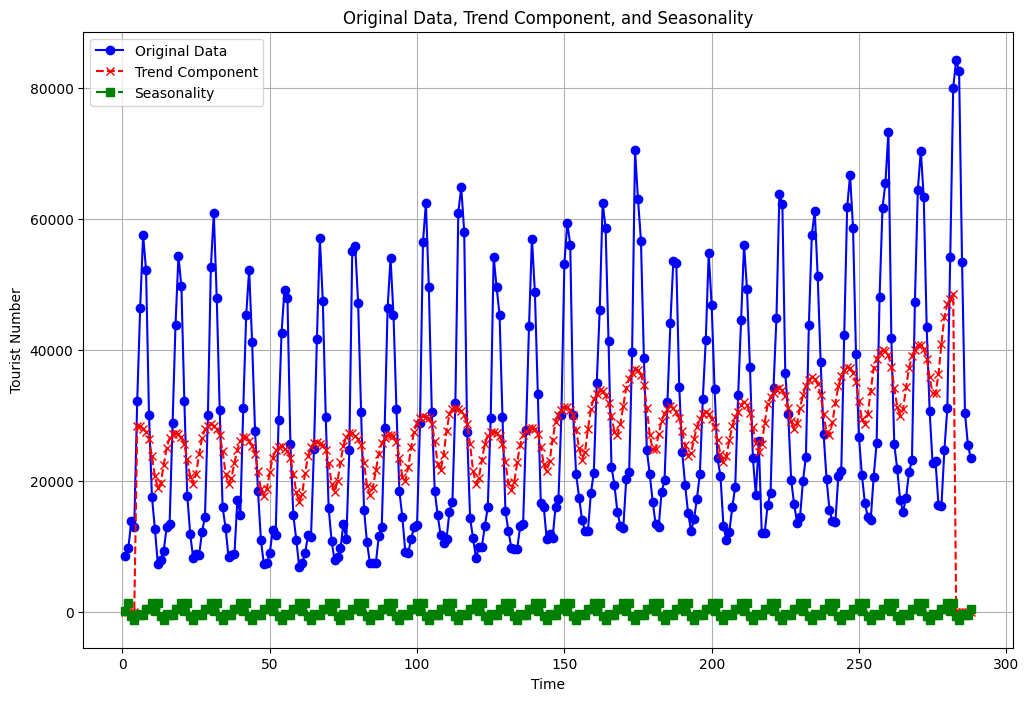

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from the CSV file

# Extract the original data (xt) from the 'TouristNumber' column
xt = data['TouristNumber'].tolist()

# Step 2: The trend values are already stored in 'trend_values_dict' (no need to define new values)
# Example:
# trend_values_dict = {1: ..., 2: ..., ...}

# Step 3: The seasonal component is already stored in 'seasonal_component'
# Example:
# seasonal_component = [value1, value2, ...]

# Step 4: Prepare data for plotting
x_values = list(range(1, len(xt) + 1))

# Get trend values and seasonal component for plotting
trend_values_full = [trend_values_dict.get(t, 0) for t in x_values]
seasonal_values = [seasonal_component[(t - 1) % len(seasonal_component)] for t in x_values]

# Step 5: Print the data in a table format
print(f"{'Time':<5}{'Original Data':<15}{'Trend Component':<20}{'Seasonal Component':<20}")
print("-" * 60)
for i in range(len(xt)):
    time = i + 1
    original = xt[i]
    trend = trend_values_full[i] if i < len(trend_values_full) else 0
    seasonal = seasonal_values[i] if i < len(seasonal_values) else 0
    print(f"{time:<5}{original:<15}{trend:<20.4f}{seasonal:<20.4f}")

# Step 6: Plot the original data, trend component, and seasonality
plt.figure(figsize=(12, 8))

# Original Data
plt.plot(x_values, xt, label='Original Data', marker='o', color='blue')

# Trend Component
plt.plot(x_values, trend_values_full, label='Trend Component', color='red', linestyle='--', marker='x')

# Seasonal Component
plt.plot(x_values, seasonal_values, label='Seasonality', color='green', linestyle='-.', marker='s')

plt.xlabel('Time')
plt.ylabel('Tourist Number')
plt.title('Original Data, Trend Component, and Seasonality')
plt.legend()
plt.grid(True)
plt.show()
